In [19]:
import pandas as pd
import numpy as np

df1 = pd.read_excel('평균매매가격_종합.xlsx') # Excel File 불러오기
df2 = df1.iloc[9:] # 데이터가 있는 부분만 추출
df3 = df2.rename(columns = df2.iloc[0]) # 첫 행을 열 이름으로 설정
df4 = df3.iloc[1:] # 열 이름으로 설정된 행을 제외시킴
df5 = df4.reset_index() # index 재설정
df6 = df5.iloc[:, 1:] # index열을 제외시킴
df7 = df6[df6['지 역'].notna()] # '지역' 열에서 NaN값이 있는 행을 제외
df8 = df7.reset_index() # index 재설정
df9 = df8.iloc[:, 1:] # index 열을 제외
df10 = df9.drop(df9.columns[1:27], axis = 1) # 2012, 2013년 데이터를 제외시킴
df11 = df10.T # 행/열 변경
df12 = df11.rename(columns = df11.iloc[0]) # 첫 행을 열 이름으로 설정
df13 = df12.iloc[1:121] # 2024년의 데이터를 제외시킴
idx_val = df13.index.values

for i in range(len(idx_val)) : # 연도별로 index 값 통합(연도별로 평균을 계산하기 위해)
    if i < 12 :
        idx_val[i] = 2014
    elif i < 24 :
        idx_val[i] = 2015
    elif i < 36 :
        idx_val[i] = 2016
    elif i < 48 :
        idx_val[i] = 2017
    elif i < 60 :
        idx_val[i] = 2018
    elif i < 72 :
        idx_val[i] = 2019
    elif i < 84 :
        idx_val[i] = 2020
    elif i < 96 :
        idx_val[i] = 2021
    elif i < 108 :
        idx_val[i] = 2022
    elif i < 120 :
        idx_val[i] = 2023
        
df13.index = idx_val
df13.index.name = '연도별 종합주택유형 매매가 평균(단위 : 천원)' # 행 이름 설정
df14 = df13.groupby('연도별 종합주택유형 매매가 평균(단위 : 천원)').mean() # 연도별 평균 계산
df14.loc[:, '전국' : '제주'] = df14.loc[:,'전국' : '제주'].astype(int) # data type 변경(float -> int32)
df15 = df14.drop(df14.columns[1:7], axis = 1) # '수도권' ~ '8개도'까지의 열을 제외시킴
df15.to_excel('종합주택유형_평균매매가격.xlsx') # Excel File로 저장
df15

,전국,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
연도별 종합주택유형 매매가 평균(단위 : 천원),,,,,,,,,,,,,,,,,,
2014,232746,445022,260287,189538,190090,188890,138741,192209,209553,160109,116631,135233,138308,104832,84287,123166,163420,140588
2015,239050,454295,263318,193661,196434,214495,155250,200736,224124,176995,121708,137684,136313,110126,88516,127071,171038,164647
2016,246889,468677,270389,196058,204957,231217,170748,209879,238508,198060,127557,136586,131961,115889,93272,126780,175817,207546
2017,253285,484823,276020,200360,216682,235100,174749,214789,240368,225823,131069,137037,131291,119274,96824,125778,175557,238004
2018,285257,576621,300697,214859,247442,266624,209404,224571,249331,288625,146120,145196,137058,141598,108254,130241,176949,274980
2019,306444,647371,319955,226395,246349,286268,235684,250136,242629,324877,151446,146481,148360,143759,120461,132121,175894,311670
2020,329854,693632,357853,257562,261897,301799,239360,296794,255253,431001,153527,150998,153323,146834,123512,133795,178287,301526
2021,386716,792630,452987,310502,325451,355614,263080,343400,301135,588182,161072,175935,180441,152953,130960,145713,200662,291255
2022,421744,873719,511498,338861,361008,366910,282512,350228,317406,615167,166447,194422,198365,156230,136198,152931,217403,284841


In [5]:
import pandas as pd

# 엑셀 파일 읽기
df1 = pd.read_excel('연도별_주택거래.xlsx')

# 열 이름 변경
df1.rename(columns = {'* 통계표명 :': '지역/년도/거래량(단위:동(호))', '연도별_주택거래': '동(호)'}, inplace = True)

# 불필요한 열 삭제
df1.drop(columns = ['Unnamed: 2'], inplace = True)

# 필터링할 지역 목록
regions = [
    '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', 
    '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', 
    '(구)제주', '제주'
]

# '지역/년도' 열을 기준으로 정렬하기 전에 지역을 필터링
filtered_df = df1[df1['지역/년도/거래량(단위:동(호))'].isin(regions)]

# 필터링된 데이터프레임에서 열 이름 변경
num_columns = len(filtered_df.columns) # 현재 열의 개수
new_column_names = ['지역/년도/거래량(단위:동(호))', '동(호)']  # 첫 두 열 이름

# '동(호)', '면적' 순서로 반복 생성
for i in range(2, num_columns):
    if (i - 2) % 2 == 0:
        new_column_names.append('동(호)')
    else:
        new_column_names.append('면적')

# 열 이름을 변경
filtered_df.columns = new_column_names

# '면적' 열 삭제 (단, '면적' 열을 제외한 열을 남김)
filtered_df = filtered_df.loc[:, filtered_df.columns != '면적']

# '지역/년도/거래량(단위:동(호))'와 '동(호)' 열의 위치를 바꾸기
# '지역/년도/거래량(단위:동(호))'을 인덱스로 설정하고, '동(호)'를 열로 이동
filtered_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').reset_index()
filtered_df = filtered_df[['동(호)', '지역/년도/거래량(단위:동(호))'] + \
                          [col for col in filtered_df.columns if col not in ['동(호)', '지역/년도/거래량(단위:동(호))']]]

# 데이터프레임을 전치(행과 열 바꾸기)
transposed_df = filtered_df.set_index('지역/년도/거래량(단위:동(호))').T

# NaN으로 나오는 행 삭제
transposed_df.dropna(how = 'all', inplace = True)

# 상위 8행 삭제
transposed_df = transposed_df.iloc[8:]

# 마지막 행 삭제
transposed_df = transposed_df.iloc[:-1]

# 연도 열 추가 (2014년부터 2023년까지)
years = list(range(2014, 2024)) # 정수형으로 연도 리스트 생성
transposed_df.insert(0, '년도', years)

# 연도와 나머지 열의 순서 조정
transposed_df = transposed_df[['년도'] + [col for col in transposed_df.columns if col != '년도']]

# '년도' 열을 인덱스로 설정
transposed_df.set_index('년도', inplace = True)

# '(구)제주' 열 삭제
if '(구)제주' in transposed_df.columns:
    transposed_df.drop(columns = '(구)제주', inplace = True)

# # 변경된 데이터프레임을 엑셀 파일로 저장
# output_file = '변경된_주택거래.xlsx'
# transposed_df.to_excel(output_file)
# print(f"\n변경된 데이터가 '{output_file}'로 저장되었습니다.")

transposed_df

지역/년도/거래량(단위:동(호)),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년도,,,,,,,,,,,,,,,,,,
2014,1447123,201991,128800,87003,85291,61913,43298,48128,17004,319526,42416,44459,67300,46497,39626,78634,119263,15974
2015,1720795,280313,158998,88922,106224,57374,40477,49493,37627,418790,42673,43439,67654,47483,49470,94760,117188,19910
2016,1624032,285594,139617,67374,107841,44858,40436,33826,22996,433418,56582,45707,63271,46244,45339,69876,100245,20808
2017,1759661,281181,131933,78530,117491,58186,43421,32204,33096,504477,54792,47511,69652,49900,47877,76185,113816,19409
2018,1719231,264278,104400,78610,110643,60453,48520,26896,30294,551129,53474,54604,63121,59699,54022,64437,77257,17394
2019,1569498,210898,110988,82348,121143,46011,55269,32546,21667,481473,50231,43465,59495,47115,51051,56605,85883,13310
2020,2021865,273895,164614,116910,158372,64546,55032,42546,26273,590982,58990,54802,84055,60439,65544,78593,111858,14414
2021,1620781,193003,100250,69673,136626,44061,36700,30142,13695,441499,65725,62999,97283,54492,51479,92810,113434,16910
2022,933347,97102,53590,28768,76035,28706,26322,17070,7318,229488,38834,44027,57126,42209,43316,60388,69480,13568


In [49]:
df1

,지역/년도/거래량(단위:동(호)),동(호),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,* 수록기간 :,2006년 ~ 2024년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,* 조회기간 :,2006년 ~ 2024년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,* 출처 :,국토교통부,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,* 자료다운일자 :,2024.08.14 04:14:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,* 단위 :,"동(호)수,천㎡",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,NaN,(구)북제주군,466,38,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
309,NaN,(구)남제주군,260,23,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
310,제주,NaN,4203,365,7469,629,7223,579,7291,614,...,14414,1191,16910,1433,13568,1147,9754,816,5249,438
311,NaN,제주시,3455,302,5834,497,5271,431,5598,469,...,10174,842,11650,984,9565,800,6800,553,3901,317


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
plt.rc('font', family = 'Malgun Gothic', size = '14')

# CSV 파일 읽기
df2 = pd.read_excel('변경된_주택거래.xlsx')

# '서울'과 '경기' 데이터만 필터링
df_filtered = df2[['년도', '서울', '경기']]

# '지역/년도/거래량(단위:동(호))' 열을 인덱스로 설정
df_filtered.set_index('년도', inplace = True)

df_filtered

,서울,경기
년도,,
2014,201991,319526
2015,280313,418790
2016,285594,433418
2017,281181,504477
2018,264278,551129
2019,210898,481473
2020,273895,590982
2021,193003,441499
2022,97102,229488


C:\Users\user\AppData\Local\Temp\ipykernel_10548\481769402.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes2.set_yticklabels(['{:.0f}'.format(x) for x in cur_val], fontsize = 25)


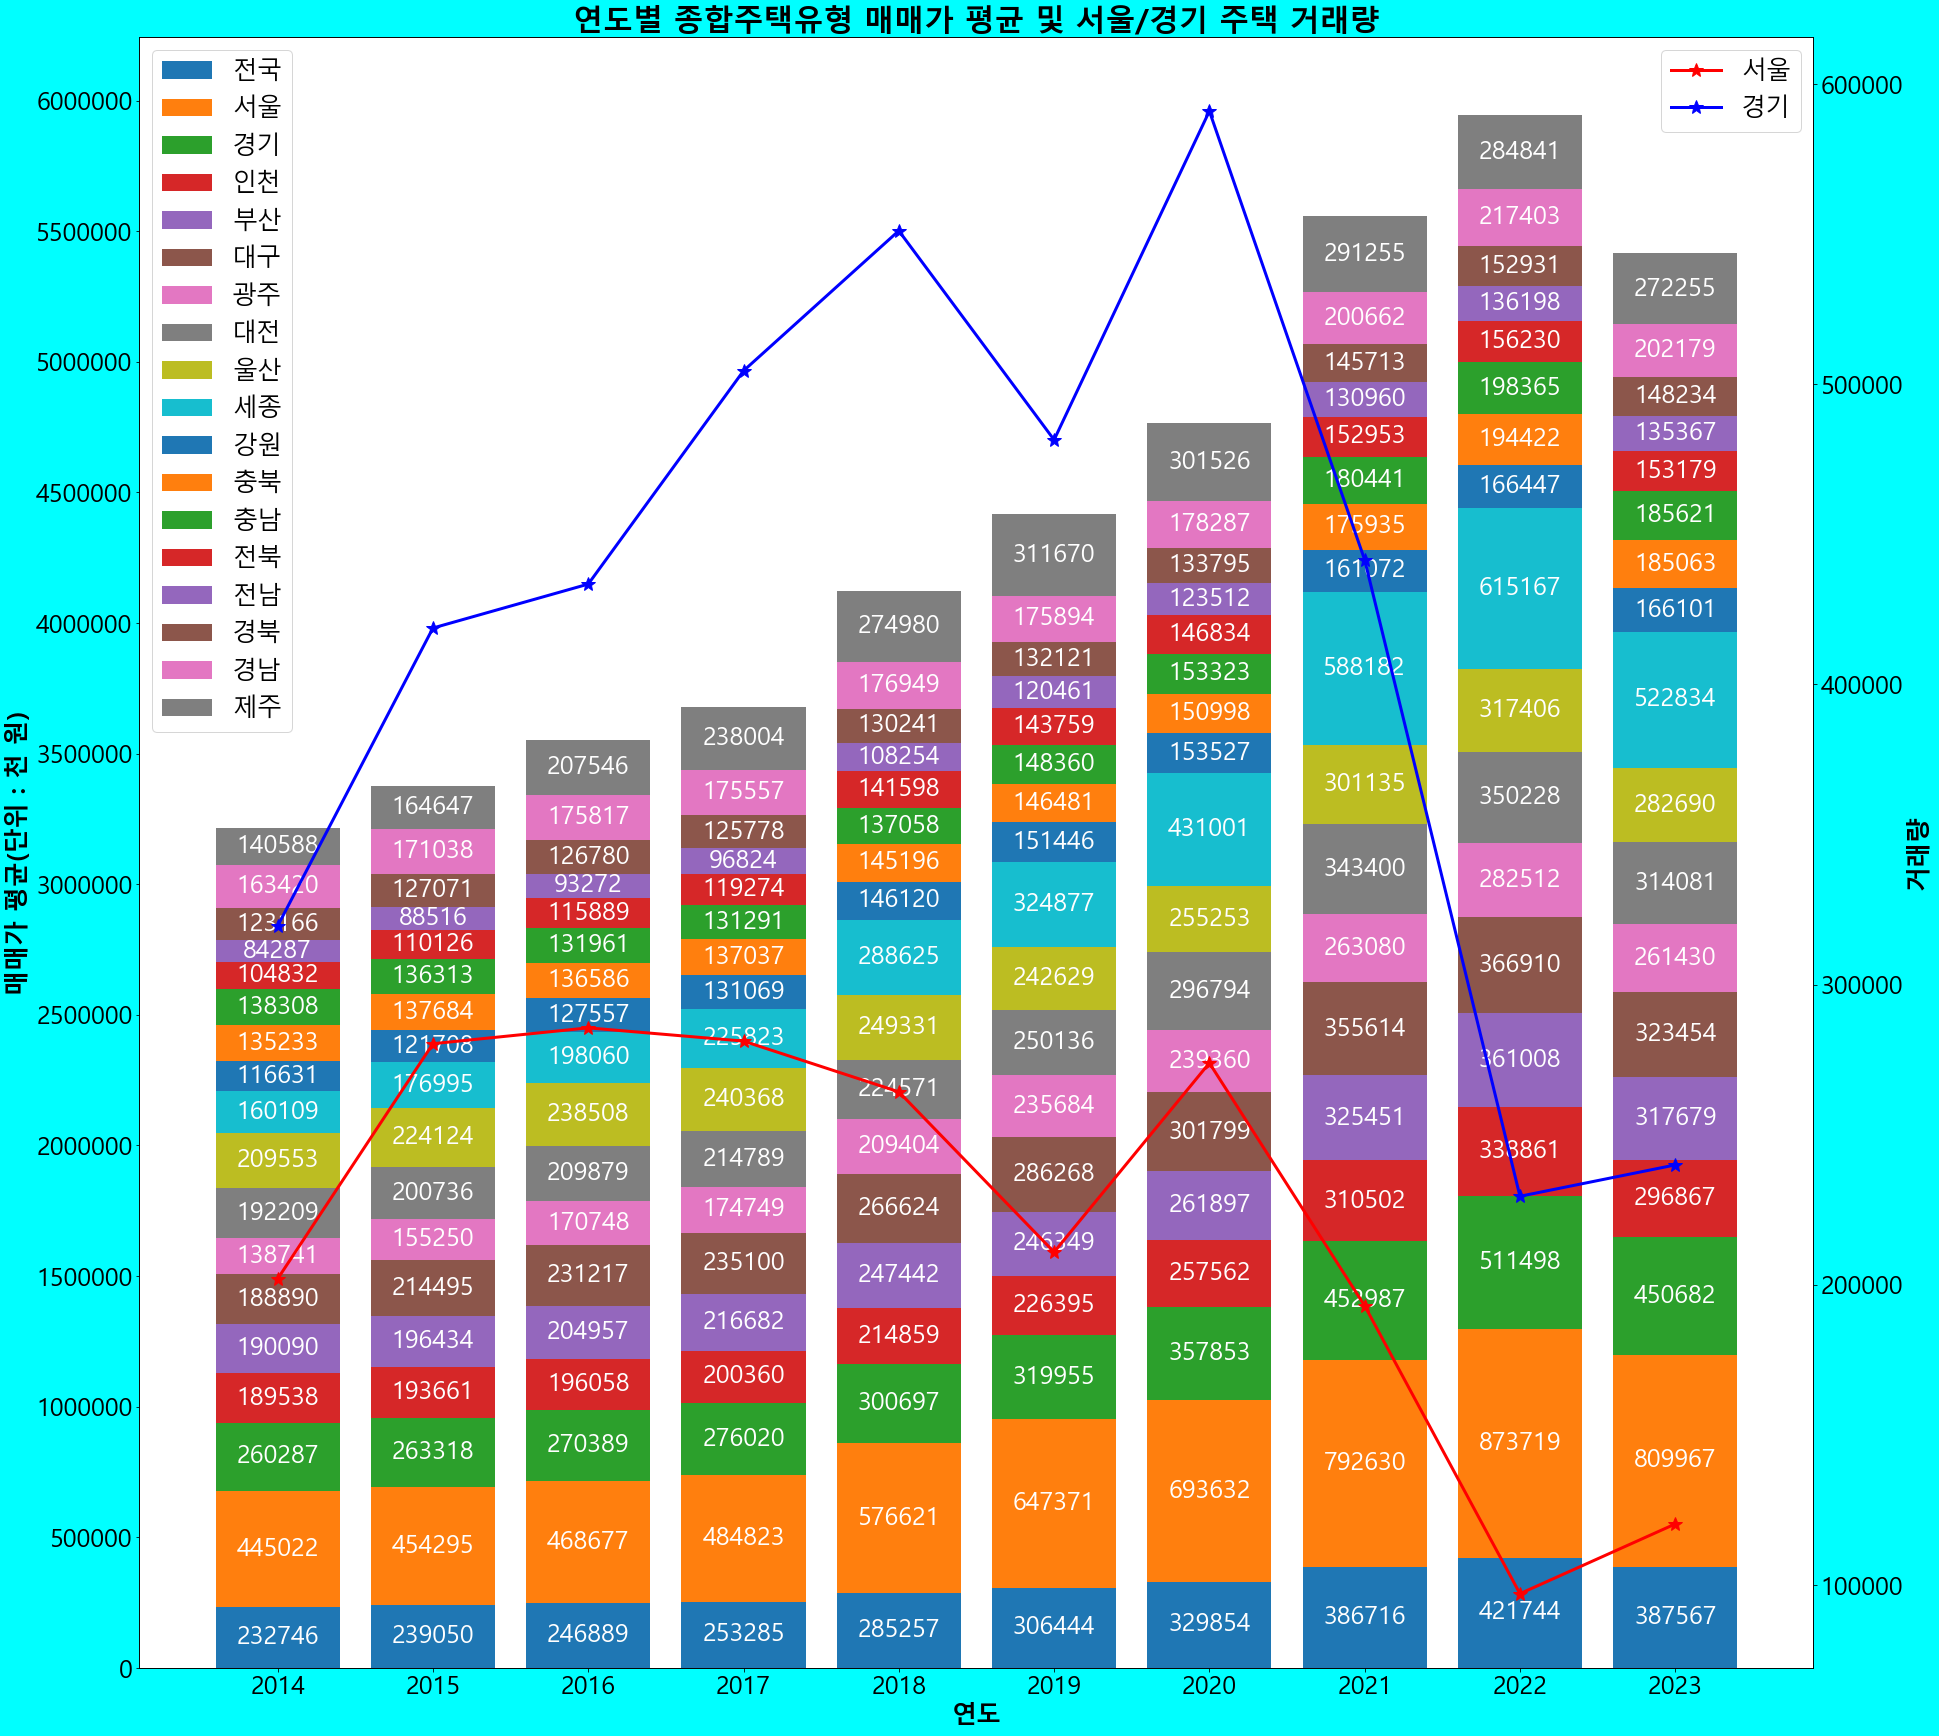

In [8]:
from matplotlib import pyplot as plt
import numpy as np
    
# 한글 Font 설정
plt.rc('font', family = 'Malgun Gothic', size = '14')

fig = plt.figure(figsize = (30, 30), facecolor = 'cyan')

axes1 = fig.add_subplot(111)

years = df15.index
bottom_array = np.zeros(len(years))

for region in df15.columns:
    value = axes1.bar(years, df15.loc[:, region], bottom = bottom_array, label = region)
    bottom_array += df15.loc[:, region]
    
    axes1.bar_label(value, label_type = 'center', fontsize = 25, color = 'white') # 막대별 값 표시
    
axes1.legend(df15.columns, fontsize = 25)
axes1.set_xticks(years)

current_index = axes1.get_xticks()

axes1.set_xticklabels(current_index, fontsize = 25)
axes1.set_xlabel('연도', fontsize = 25, fontweight = 'bold')
axes1.set_yticks(np.arange(0, 6000001, 500000), fontsize = 25, fontweight = 'bold')

current_value = axes1.get_yticks()

axes1.set_yticklabels(['{:.0f}'.format(x) for x in current_value], fontsize = 25) # y축 값 범위가 백만 단위로 표시되는 문제 해결
axes1.set_ylabel('매매가 평균(단위 : 천 원)', fontsize = 25, fontweight = 'bold')

axes2 = axes1.twinx()
axes2.plot(df_filtered.index, df_filtered['서울'], color = 'red',\
           marker = '*', label = '서울', lw = 3.0, ms = 15.0)
axes2.plot(df_filtered.index, df_filtered['경기'], color = 'blue',\
           marker = '*', label = '경기', lw = 3.0, ms = 15.0)

cur_val = axes2.get_yticks()

axes2.set_yticklabels(['{:.0f}'.format(x) for x in cur_val], fontsize = 25)
axes2.set_ylabel('거래량', fontsize = 25, fontweight = 'bold')
axes2.legend(fontsize = 25)

plt.title('연도별 종합주택유형 매매가 평균 및 서울/경기 주택 거래량', fontsize = 30, fontweight = 'bold')
plt.savefig('연도별 종합주택유형 매매가 평균 및 서울과 경기 주택 거래량.png')
plt.show()